<!--NOTEBOOK_HEADER-->
*This notebook contains material from [CBE60499](https://ndcbe.github.io/CBE60499);
content is available [on Github](git@github.com:ndcbe/CBE60499.git).*


<!--NAVIGATION-->
< [3.5 Quasi-Newton Methods for Unconstrained Optimization](https://ndcbe.github.io/CBE60499/03.05-Quasi-Newton-Method.html) | [Contents](toc.html) | [Tag Index](tag_index.html) | [3.7 Algorithms Homework 1](https://ndcbe.github.io/CBE60499/03.07-Algorithms1.html) ><p><a href="https://colab.research.google.com/github/ndcbe/CBE60499/blob/master/docs/03.06-Globalization.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://ndcbe.github.io/CBE60499/03.06-Globalization.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 3.6 Descent and Globalization

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 3.6.1 Define Test Function and Derivatives

Let's get started by defining a test function we will use throughout the notebook.

Consider a scalar function $f(x): \mathbb{R} \rightarrow \mathbb{R}$ to allow for easier visualization. Let

$$f(x) = 0.5 (x-1)^4 + (x+1)^3 - 10 x^2 + 5 x$$

$$f'(x) = 6 - 8 x - 3 x^2 + 2 x^3$$

$$f''(x) = -8 - 6 x + 6 x^2 $$

In [2]:
## Define f(x)
f = lambda x : 0.5*(x-1)**4 + (x+1)**3 - 10*x**2 + 5*x

## Define f'(x)
df = lambda x : 6 - 8*x - 3*x**2 + 2*x**3

## Define f''(x)
ddf = lambda x : -8 - 6*x + 6*x**2

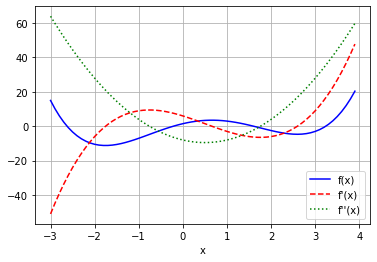

In [3]:
plt.figure()
xplt = np.arange(-3,4,0.1)

fplt = f(xplt)
dfplt = df(xplt)
ddfplt = ddf(xplt)

plt.plot(xplt, fplt, label="f(x)", color="b", linestyle="-")
plt.plot(xplt, dfplt, label="f'(x)", color="r", linestyle="--")
plt.plot(xplt, ddfplt, label="f''(x)", color="g", linestyle=":")
plt.xlabel("x")
plt.legend()
plt.grid()
plt.show()

## 3.6.2 Geometric Insights into Newton Steps

### 3.6.2.1 Motivation

We can interpret Newton-type methods for unconstrained optimization as root finding of $\nabla f(x) = 0$.

At iteration $k$, we assemble an approximation to $f(x)$ using a Taylor series expansion:

$$f(x^k + p^k) \approx f(x^k) + \nabla f(x^k)^T p^k + \frac{1}{2} (p^k)^T (B^k) p^k$$

and solve for $p^k$ such that $f(x^k + p^k)=0$. This gives:

$$p^k = -(B^k)^{-1} \nabla f(x^k)$$

The choice of $B^k$ determines the algorithm classification:
* Pure **Newton Method**, $B^k = \nabla^2 f(x^k)$
* **Steepest Descent**, $B^k = \frac{1}{\alpha} I$, where scalar $\alpha$ is sometimes known as the dampening factor
* **Levenberg-Marquart**, $B^k = \nabla^2 f(x^k) + \delta I$, where scalar $\delta$ is chosen to ensure $B^k$ is positive definite.
* **Broyden Methods**, $B^{k}$ is approximated using history of gradient evaluations, i.e., $\nabla f(x^0), ... \nabla f(x^k)$. We will study the SR1 and BFGS formulas in this family of methods.

This section **explores how choosing $B^k$ impacts the shape of the approximation and calculated step.**

### 3.6.2.2 Compute and Plot Steps

Define a function that:
* Computes the i. Newton, ii. Levenberg-Marquardt and iii. Steepest Descent Step for a given starting point $x_0$
* Plots the step in terms of $f(x)$ and $f'(x)$

In [4]:
def calc_step(x0, epsLM):
    
    # Evaluate f(x0), f'(x0) and f''(x0)
    f0 = f(x0)
    df0 = df(x0)
    ddf0 = ddf(x0)
    print("x0 = ",x0)
    print("f(x0) =",f0)
    print("f'(x0) =",df0)
    print("f''(x0) =",ddf0)
    
    
    ### Calculate steps
    
    # Newtwon Step
    xN = x0 - df0 / ddf0
    
    print("\n### Newton Step ###")
    print("xN = ",xN)
    print("pN = xN - x0 = ",xN - x0)
    f_xN = f(xN)
    print("f(xN) = ",f_xN)
    print("f(xN) - f(x0) = ",f_xN - f0)
    
    # Levenberg-Marquardt Step
    # Recall the eigenvalue of a 1x1 matrix is just that value
    dffLM = np.amax([ddf0, epsLM])
    xLM = x0 - df0 / dffLM
    
    print("\n### Levenberg-Marquardt Step ###")
    print("xLM = ",xLM)
    print("pLM = xLM - x0 = ",xN - x0)
    f_xLM = f(xLM)
    print("f(xLM) = ",f_xLM)
    print("f(xLM) - f(x0) = ",f_xLM - f0)
    
    
    # Steepest Descent Step
    xSD = x0 - df0 / 1
    
    print("\n### Steepest Descent Step ###")
    print("xSD = ",xSD)
    print("pSD = xSD - x0 = ",xSD - x0)
    f_xSD = f(xSD)
    print("f(xSD) = ",f_xSD)
    print("f(xSD) - f(x0) = ",f_xSD - f0)
    
    ### Plot Surrogates on x vs f(x)
    
    ### Plot f(x)
    plt.figure()
    plt.scatter(x0,f0,label="$x_0$",color="black")
    plt.plot(xplt, fplt, label="f(x)",color="purple")
    
    ### Plot approximation for Newton's method
    fN = lambda x : f0 + df0*(x - x0) + 0.5*ddf0*(x-x0)**2
    plt.plot(xplt, fN(xplt),label="Newton",linestyle="--",color="red")
    plt.scatter(xN, f(xN),color="red",marker="x")
    
    
    ### Plot approximation for LM
    fLM = lambda x : f0 + df0*(x-x0) + 0.5*dffLM*(x-x0)**2
    plt.plot(xplt, fLM(xplt),label="LM",linestyle="--",color="blue")
    plt.scatter(xLM, f(xLM),color="blue",marker="x")

    ### Plot approximation for SD
    fSD = lambda x : f0 + df0*(x-x0) + 0.5*(x-x0)**2
    plt.plot(xplt, fSD(xplt),label="Steepest",linestyle="--",color="green")
    plt.scatter(xSD, f(xSD),color="green",marker="x")
    
    #plt.plot([x0, xLM],[f0, f(xLM)],label="LM",color="green",marker="o")
    #plt.plot([x0,xSD],[f0,f(xSD)],label="Steepest",color="blue",marker="s")
    
    plt.xlim((-3.5,4.5))
    plt.ylim((-12.5,22.5))
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    plt.legend()
    plt.title("Function and Surrogates")
    plt.grid()
    plt.show()
    
    ### Plot Surrogates on x vs f(x)
    plt.figure()
    plt.scatter(x0,df0,label="$x_0$",color="black")
    plt.plot(xplt, dfplt, label="f'(x)",color="purple")
    
    
    ### Plot approximation for Newton's method
    dfN = lambda x : df0 + ddf0*(x-x0)
    plt.plot(xplt, dfN(xplt),label="Newton",linestyle="--",color="red")
    plt.scatter(xN, df(xN),color="red",marker="x")
    
    
    ### Plot approximation for LM
    dfLM = lambda x : df0 + dffLM*(x-x0)
    plt.plot(xplt, dfLM(xplt),label="LM",linestyle="--",color="blue")
    plt.scatter(xLM, df(xLM),color="blue",marker="x")

    ### Plot approximation for SD
    dfSD = lambda x : df0 + (x-x0)
    plt.plot(xplt, dfSD(xplt),label="Steepest",linestyle="--",color="green")
    plt.scatter(xSD, df(xSD),color="green",marker="x")
    
    
    plt.xlim((-3.5,4.5))
    plt.ylim((-50,50))
    plt.xlabel("$x$")
    plt.ylabel("$f'(x)$")
    plt.legend()
    plt.title("First Derivative and Surrogates")
    plt.grid()
    plt.show()

### 3.6.2.3 Consider $x_0 = -3$

x0 =  -3
f(x0) = 15.0
f'(x0) = -51
f''(x0) = 64

### Newton Step ###
xN =  -2.203125
pN = xN - x0 =  0.796875
f(xN) =  -8.660857647657394
f(xN) - f(x0) =  -23.660857647657394

### Levenberg-Marquardt Step ###
xLM =  -2.203125
pLM = xLM - x0 =  0.796875
f(xLM) =  -8.660857647657394
f(xLM) - f(x0) =  -23.660857647657394

### Steepest Descent Step ###
xSD =  48.0
pSD = xSD - x0 =  51.0
f(xSD) =  2534689.5
f(xSD) - f(x0) =  2534674.5


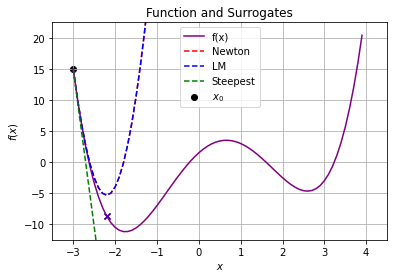

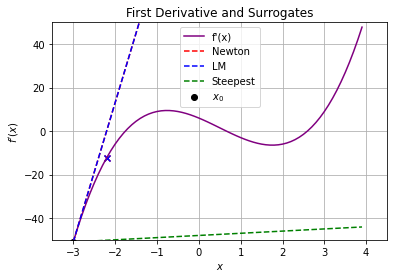

In [5]:
calc_step(-3,1E-2)

**Discussion**
* In this case, do we expect the Newton and LM steps to be the same? Explain.
* Why does $f(x)$ increase with a steepest descent ($B^k = I$) step? I thought the main idea was that because $B^k$ is **positive definite** the step is in a **descent direction**!

### 3.6.2.4 Consider $x_0 = 0$

x0 =  0
f(x0) = 1.5
f'(x0) = 6
f''(x0) = -8

### Newton Step ###
xN =  0.75
pN = xN - x0 =  0.75
f(xN) =  3.486328125
f(xN) - f(x0) =  1.986328125

### Levenberg-Marquardt Step ###
xLM =  -600.0
pLM = xLM - x0 =  0.75
f(xLM) =  65014556401.5
f(xLM) - f(x0) =  65014556400.0

### Steepest Descent Step ###
xSD =  -6.0
pSD = xSD - x0 =  -6.0
f(xSD) =  685.5
f(xSD) - f(x0) =  684.0


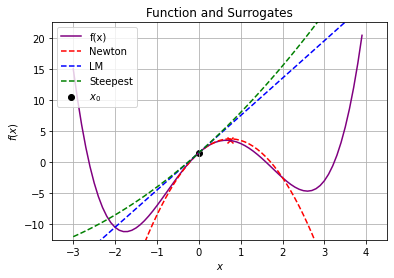

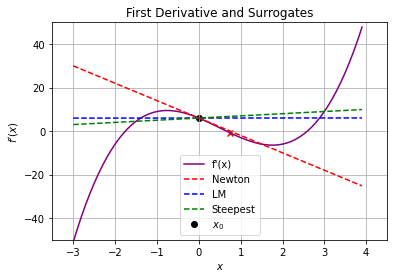

In [6]:
calc_step(0,1E-2)

**Discussion**
* Why does $f(x)$ increase for all of the steps?
* Explain Newton-type method in the context of root finding for $\nabla f(x) = 0$ using the second plot.

### 3.6.2.5 Descent Properties

![book](figures/descent_direction.png)

## 3.6.3 Line Search

Excerpts from **Section 3.4** in Biegler (2010).

![book](figures/linesearch_conditions.png)

![book](figures/Thm3-3.png)

![book](figures/Alg3-2.png)

![book](figures/Thm3-4.png)

### 3.6.3.1 Visualization Code

**Goal**: Visualize Amijo and Goldstein conditions for an example.

In [7]:
def plot_alpha(xk,eta_ls=0.25,algorithm="newton",alpha_max=1.0):
    '''
    Calculate step and visualize line search conditions
    
    Arguments:
        xk : initial point (required)
        eta_ls : eta in Goldstein-Armijo conditions
        algorithm : either "newton" or "steepest-descent"
        alpha_max : plots alpha between 0 and alpha_max
        
    Returns:
        Nothing
        
    Creates:
        Plot showing function value and line search conditions as a function of alpha
    '''
    
    fxk = f(xk)
    dfxk = df(xk)
    
    if(algorithm == "newton"):
        pk = - dfxk / ddf(xk)
    elif algorithm == "steepest-descent":
        pk = - dfxk
    else:
        print("algorithm argument must be either 'newton' or 'steepest-descent'")
    
    print("Considering xk =",xk,"and f(xk) = ",fxk)
    print("Step with",algorithm,"algorithm:")
    print("pk = ",pk)
    print("With full step, xk+1 =",pk + xk,"and f(xk+1) =",f(xk + pk))
    
    n = 100
    alpha = np.linspace(0,alpha_max,n)
    fval = np.zeros(n)
    
    for i in range(0,n):
        fval[i] = f(xk + alpha[i]*pk)
    
    fs = 18
    plt.figure()
    
    # Evaluate f(x^{k+1}) for different alpha values
    plt.plot(alpha,fval,color="blue",label=r"$f(x^{k+1})$")
    
    # Armijo condition
    arm = np.zeros(n)
    for i in range(0,n):
        arm[i] = fxk + eta_ls*alpha[i]*dfxk*pk
    
    plt.plot(alpha,arm,color="red",label="Armijo")
        

    # Goldstein condition
    gold = np.zeros(n)
    for i in range(0,n):
        gold[i] = fxk + (1-eta_ls)*alpha[i]*dfxk*pk
    
    plt.plot(alpha,gold,color="green",label="Goldstein")
    
    # Apply backtracking linestep (starting with alpha = alpha_max)
    i = n - 1
    flag = True
    failed = False
    while flag:
        
        if i < n-1 and fval[i] < gold[i]:
            flag = False
            print("Line search failed. Goldstein conditions violated. Consider increasing alpha_max.")
            failed = True
        
        # Armijo condition
        if fval[i] < arm[i]:
            flag = False
        else:
            i = i - 1
        
        if i < 0:
            print("Line search failed. Try decreasing alpha_max.")
            failed = True
    
    if not failed:
        print("alphak =",alpha[i],"with backtracking line search starting at alpha =",alpha_max)
        print("f(xk + alphak*pk) =",fval[i])
    
        plt.scatter(alpha[i],fval[i],marker='x',color='black',label=r"$a^{k}$ for line search")
    
    # Labels
    plt.xlabel(r"$\alpha^k$",fontsize=fs)
    plt.ylabel(r"$f(x^k + \alpha^k p^k)$",fontsize=fs)
    plt.grid()
    plt.legend()
    plt.show()

### 3.6.3.2 Newton Step, $x^k = -3$

Considering xk = -3 and f(xk) =  15.0
Step with newton algorithm:
pk =  0.796875
With full step, xk+1 = -2.203125 and f(xk+1) = -8.660857647657394
alphak = 1.5 with backtracking line search starting at alpha = 1.5
f(xk + alphak*pk) = -11.1743426900357


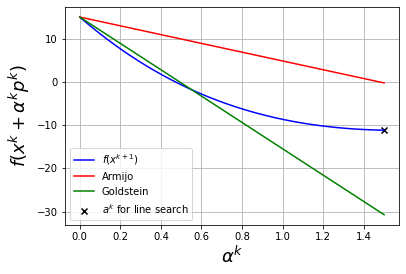

In [8]:
plot_alpha(-3,eta_ls=0.25,algorithm="newton",alpha_max=1.5)

**Discussion**
* Why did the backtracking line search stop at $\alpha^k = $ `alpha_max`?
* Is it possible to find a larger improvement in $f(x)$ with $\alpha^k > 1$?

### 3.6.3.3 Steepest Descent Step, $x^k = -3$

Considering xk = -3 and f(xk) =  15.0
Step with steepest-descent algorithm:
pk =  51
With full step, xk+1 = 48 and f(xk+1) = 2534689.5
alphak = 0.03535353535353535 with backtracking line search starting at alpha = 0.1
f(xk + alphak*pk) = -8.67145500733185


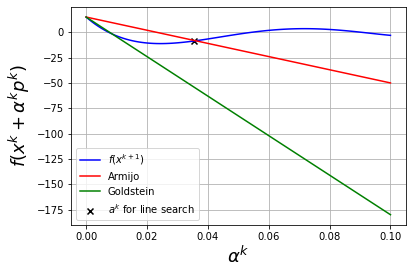

In [9]:
plot_alpha(-3,eta_ls=0.25,algorithm="steepest-descent",alpha_max=1E-1)

**Discussion**
* Why did the line search stop where the Armijo conditions are satisfied?
* Why not further decrease $\alpha^k$ to achieve a greater improvement in the objective?

## 3.6.4 Newton Step, $x^k = 0$

Considering xk = 0 and f(xk) =  1.5
Step with newton algorithm:
pk =  0.75
With full step, xk+1 = 0.75 and f(xk+1) = 3.486328125
Line search failed. Goldstein conditions violated. Consider increasing alpha_max.


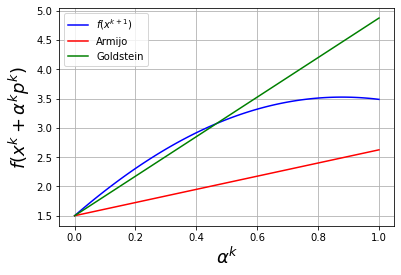

In [10]:
plot_alpha(0,eta_ls=0.25,algorithm="newton",alpha_max=1.0)

**Discussion**
* Why does the line search fail?
* How could we modify Newton's method to improve robustness?

### 3.6.4.1 Steepest Descent Step, $x^k = 0$

Considering xk = 0 and f(xk) =  1.5
Step with steepest-descent algorithm:
pk =  -6
With full step, xk+1 = -6 and f(xk+1) = 685.5
alphak = 0.4191919191919192 with backtracking line search starting at alpha = 0.5
f(xk + alphak*pk) = -2.9749848430038526


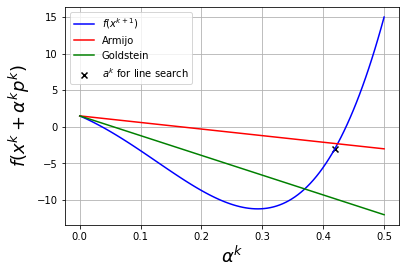

In [11]:
plot_alpha(0,eta_ls=0.25,algorithm="steepest-descent",alpha_max=5E-1)

**Discussion**
* How does the region where the Armijo and Goldstein conditions are satisfied change for different values of `eta_ls`?

## 3.6.5 Trust Regions

Excerpts from **Section 3.5** in Biegler (2010).

### 3.6.5.1 Main Idea and General Algorithm

![book](figures/trust-region-intro.png)

![book](figures/Alg3-3.png)

### 3.6.5.2 Trust Region Variations

![book](figures/TR-visual.png)

$p^C$: Cauchy step
    
$p^N$: Newton step

#### 3.6.5.2.1 Levenburg-Marquardt

![book](figures/LM-TR.png)

#### 3.6.5.2.2 Powell Dogleg

![book](figures/PD-TR.png)

![book](figures/PD-TR2.png)

<!--NAVIGATION-->
< [3.5 Quasi-Newton Methods for Unconstrained Optimization](https://ndcbe.github.io/CBE60499/03.05-Quasi-Newton-Method.html) | [Contents](toc.html) | [Tag Index](tag_index.html) | [3.7 Algorithms Homework 1](https://ndcbe.github.io/CBE60499/03.07-Algorithms1.html) ><p><a href="https://colab.research.google.com/github/ndcbe/CBE60499/blob/master/docs/03.06-Globalization.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://ndcbe.github.io/CBE60499/03.06-Globalization.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>